# Pandas - II

In [ ]:
import pandas as pd

## 1. Renaming columns and index

### 1.1 Using .rename()

We can rename both column names and index (row name) with the rename function.  A dictionary is required as parameter.

```python
# To rename columns
df.rename(columns={}) or
df.rename({}, axis=1)


# To rename rows
df.rename(index={}) or
df.rename({}, axis=0)
```

In [ ]:
# Let's revisit our clinic data
clinic_df = pd.DataFrame([
        ['January', 100, 100, 23, 100],
        ['February', 51, 45, 145, 45],
        ['March', 81, 96, 65, 96],
        ['April', 80, 80, 54, 180],
        ['May', 51, 54, 54, 154],
        ['June', 112, 109, 79, 129]
    ],
    columns=['month', 'clinic_east','clinic_north', 'clinic_south','clinic_west'])

In [ ]:
# Show renamed columns
clinic_df.rename(
    columns={
        "month": "Month",
        "clinic_east": "Clinic East",
        "CLINIC_NORTH": "CLINIC NORTH" # it is case-sensitive
    }
)

# the dataframe is not mutated.
# To apply the renamed column, either pass inplace=True to df.rename() or assign the output back to the variable

**Exercise**

> Try to rename index.

In [ ]:
# Type your code below


### 1.2 Changing column names directly

Column names can also be altered by directly replace the variable in `.columns` attribute of a dataframe.

**Warning** This method mutates the dataframe.

```python
df.columns = ['col1', 'col2']
```

In [ ]:
# Since the operation mutate the dataframe, let's create new copy
df_copy = clinic_df.copy()

df_copy.columns = ["Col1", "Col2", "Col3", "Col4", "Col5"]
df_copy

## 2. Inplace vs non-inplace operations

**Inplace** means the operation will modify the original object.
**Non-Inplace** means the operation will not modify the original object, a new object will be returned.

In general, changing attributes is **inplace** operations:
```python
df['col1'] = 1
df.columns = ["col1", "col2", "col3"]
df.index = ["Peter", "Mary", "Jude"]
```

In general, using functions are **non-inplace**:
```python
df.reset_index()
df.rename()
```

The benefit for non-inplace function:
1. we are able to chain up functions like `df.rename().reset_index().groupby()......`
2. The original object is not changed, so that we can redo commands during analysis

However, the are some exception, so we should better confirm before we use them.
```python
df.insert() # This is an inplace function
```



## 3. Adding a column

**Sample dataframe**

In [ ]:
# Example of creating column "Quantity"
example_df = pd.DataFrame([
        [1, '3 inch screw', 0.5, 0.75],
        [2, '2 inch nail', 0.10, 0.25],
        [3, 'hammer', 3.00, 5.50],
        [4, 'screwdriver', 2.50, 3.00]
    ],
    columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

example_df

### 3.1 Assign to key

One way that we can add a new column is by assigning a list of value to a key.  Very similar to assigning a dictionary value.

**Warning** This method mutates the dataframe.

In [ ]:
example_df['Quantity'] = [100, 150, 35, 50]

print("After")
example_df # original dataframe mutated.

**Exercise**

> Add a column to `example_df` called `Sold in Bulk?`. The final table should look like this:

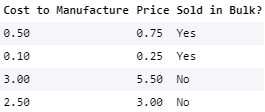

In [ ]:
# Type your code here


We can also add a new column with single value.

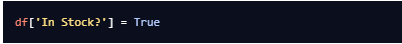

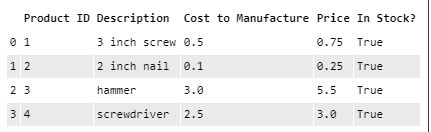

**Exercise**

- Add a column to `example_df` called `Is taxed?`, which indicates whether or not to collect sales tax on the product.

- It should be 'Yes' for all rows.

In [ ]:
# Type your code here


You can add a new column by performing a function on the existing columns.

In [ ]:
# Example of adding new column 'Sales Tax'

example_df['Sales Tax'] = example_df['Price'] * 0.75
example_df

**Exercise**

Add a column to `example_df` called `Margin`, which is equal to the difference between the Price and the Cost to Manufacture.

In [ ]:
# Type your code below


### 3.2 .insert()

Insert is an inplace operation.  It allows the insertion of column towards a specific position.

The following example insert the new column into the first position (left most).
```python
example_df.insert(0, 'Quantity2', [100, 150, 35, 50])
```


### 3.3 .assign()

Assign is the non-inplace flavor of adding a new column.  
- The original dataframe will not be changed.

In [ ]:
# Demonstration

example_df.assign(quantity3=[100, 150, 35, 50])

## 4. Index

Column names can also be altered by directly replace the variable in `.index` attribute of a dataframe.

```python
df.index = range(100, 106)
```

In [ ]:
# demonstration
example_df.index = range(100,104) # 104 is not included.
example_df

Every `dataframe` and `series` comes with an index.  Index is every useful to identify each row.  For example, index remain unchanged after we do a filtering.

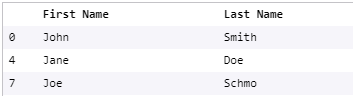

By default, when a dataframe or series is created. Indexes are consecutive numbers.

### 4.1 .set_index()

You can set the index of a dataframe or series with
1. Column name
2. Series

Note that .set_index() **DOES NOT mutate** original dataframe.

**Exercise**
    
1. Make the `month`  columns as index, and save the result into `df_month_index`

In [ ]:
# Type your code below


### 4.2 .reset_index()

> **does not mutate** original dataframe.

we get a new DataFrame with a new set of indices:

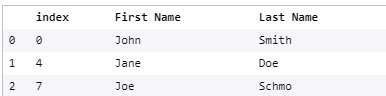

Note that the old indices have been moved into a new column called 'index'. it’s better to use the keyword `drop=True` so that you don’t end up with that extra column. If we run the command `df.reset_index(drop=True)`, we get a new DataFrame that looks like this:

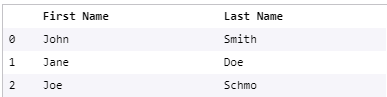

In [ ]:
# Demonstration
df1 = pd.DataFrame([
    ['John','Smith'],['Jane','Doe'],['Joe','Schmo']
],columns=['First Name', 'Last Name'])
df1

In [ ]:
df1.index = [100, 200, 300]
df1

In [ ]:
# Move the index to be a value column
df1.reset_index()

In [ ]:
# Purely reset the index to be sequential integers
df1.reset_index(drop=True)

In [ ]:
# Check that df1 is not changed (non-inplace)
df1

**Exercise**
1. Reset the index of `df_month_index`, so that the `month` column is restored

In [ ]:
# Type your code below


### 4.3 Multi index

Pandas support multi index, which mean an index with multiple levels.  

- Look up by a combination of values

It can be achieved by setting index with a list of string or series.

```python
.set_index([strings_or_series])
```

In [ ]:
# Demonstration
df = pd.DataFrame([
    [1, 1, 90],
    [1, 2, 86],
    [2, 1, 95],
    [2, 2, 93],
], columns=["student_id", "exam_id", "marks"])

df.set_index(["student_id", "exam_id"])

## 5. Transformation Operations

### 5.1 Standard Arithmetics

Operands like `+`, `-`, `*` and `/` act on pandas series in a **pair-wise** manner. We have already seen this in last lesson.


In [ ]:
# Demonstration
pd.Series([1,2,4,6]) + 1

### 5.2 Accessors

Reference:
https://pandas.pydata.org/docs/reference/series.html#accessors


When your series is of a specific data type, pandas provides an interface to access dtype-specific methods.

- Datetime, Timedelta (`.dt`)
- String (`.str`)
- Some others, which we seldom concern

```python
# Directly run lower() on a string
"AbC".lower()

# Apply lower() on every values in a series
aSeries = pd.Series([
  "Abc",
  "dEF
])
aSeries.str.lower()
```


We can apply a function to every value in a particular column. For example, this code overwrites the existing 'Name' columns by applying the function upper to every row in 'Name'.

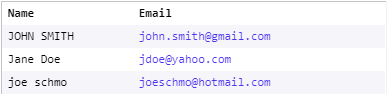

```python
df['Name'] = df.Name.str.upper()
```

In [ ]:
# Demonstration
df1 = pd.DataFrame([
    ['John', 'Smith'],
    ['Jane', 'Doe'],
    ['Joe', 'Schmo']
],columns=['First Name', 'Last Name'])

df1['Last Name Lowered'] = df1['Last Name'].str.lower()
df1

**Exercise**

> Apply the function `lower` to all names in column 'Name' in `employee_df`. Assign these new names to a new column of `employee_df` called 'Lowercase Name'

In [ ]:
employee_df = pd.read_csv("https://drive.google.com/u/1/uc?id=1d5MX8MBucLfrRkrxMyrXPMmcp4AzeNk7&export=download")

# Type your code below


### 5.3 series's .apply()

In [ ]:
# Demonstration
def square(x):
    return x ** 2

s = pd.Series([20, 21, 12], index=['London', 'New York', 'Helsinki'])
s.apply(square)

In Pandas, we often use lambda functions to perform complex operations on columns. For example, suppose that we want to extract the email provider for each email address in the following table:

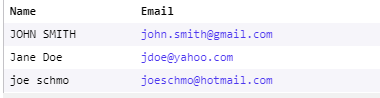

In [ ]:
# Demonstration
email_df = pd.DataFrame([
    ['Jennie Kim', 'jennie@gmail.com'],
    ['Jisoo', 'jisoo@gmail.com'],
    ['Rose', 'rose@hotmail.com'],
    ['Lalisa', 'lalisa@yahoo.com']
], columns=['Name', 'Email'])
email_df['provider'] = email_df['Email'].apply(lambda n : n.split('@')[-1])
email_df

### 5.4 dataframe's .apply()

Series' apply:
- Take 1 input, send 1 output

DataFrame's apply:
- Take 1 series of input, send 1 output
- Can operate in column mode (axis=0) or row mode (axis=1)
- Row mode is more common is data analytics

To access particular values of the row, we use the syntax `row.column_name` or `row[‘column_name’]`.

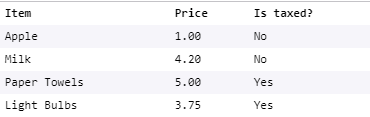

In [ ]:
# Demonstration
def create_email_heading(row):
  # row is a series
  # We can use row['Name'] to access the value because 'Name' is one of the index value of row
  return row['Name'] + "<" + row['Email'] + ">"

email_df["Email heading"] = email_df.apply(create_email_heading, axis=1)
email_df